# 1. Linear Regression

<img align="center" width="500" height="500" src="images/Convex_optimization.png">

# Method 1 using directly value of RMSE function

In [2]:
#Khai báo thư viện
import numpy as np 
import matplotlib.pyplot as plt

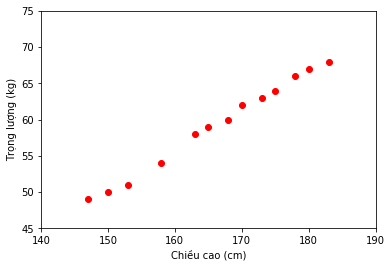

In [4]:
#Dự đoán trọng lượng của một người bằng chiều cao của người đó
#Tạo dữ liệu 1 chiều 
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
#Target
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T
#Plot graph
plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('Chiều cao (cm)')
plt.ylabel('Trọng lượng (kg)')
plt.show()

In [55]:
#Tạo ma trận x0 ∈ R^13x1
one = np.ones((X.shape[0], 1))
#Ma trận x_bar ∈ R^13x2 gồm x0 và X 
Xbar = np.concatenate((one, X), axis = 1)

In [56]:
#Tính dùng hàm linaglg.inv ma trận nghịch đảo
theota_1=np.linalg.inv(Xbar.T.dot(Xbar)).dot(Xbar.T).dot(y)
#Tính dùm hàm linaglg.pinv ma trận tựa nghịch đảo
theota_2=np.linalg.pinv(Xbar).dot(y)
theota_1,theota_2

(array([[-33.73541021],
        [  0.55920496]]), array([[-33.73541021],
        [  0.55920496]]))

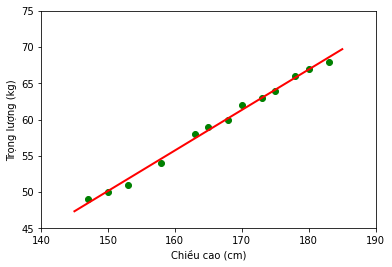

In [57]:
#Cho hai giá trị X_0 để tìm Y_0 rồi vẽ đồ thị
#Phương trình y = theta0+theta1*x
X_0=np.array([[145],[185]])
X_0_bar=np.concatenate((np.ones((2, 1)),X_0),axis = 1)
Y_0=X_0_bar.dot(theota_1)

plt.plot(X.T, y.T, 'go')     
plt.plot(X_0, Y_0,'r',linewidth=2)            
plt.axis([140, 190, 45, 75])
plt.xlabel('Chiều cao (cm)')
plt.ylabel('Trọng lượng (kg)')
plt.show()

In [58]:
y1 =theota_1[0][0]+theota_1[1][0]*155
y2 =theota_1[0][0]+theota_1[1][0]*160
print( 'Predict weight of person with height 155 cm:',int(y1) , '(kg), real number: 52 (kg)' )
print( 'Predict weight of person with height 160 cm:',int(y2) , '(kg), real number: 56 (kg)'  )

Predict weight of person with height 155 cm: 52 (kg), real number: 52 (kg)
Predict weight of person with height 160 cm: 55 (kg), real number: 56 (kg)


# Method 2 using gradients descent

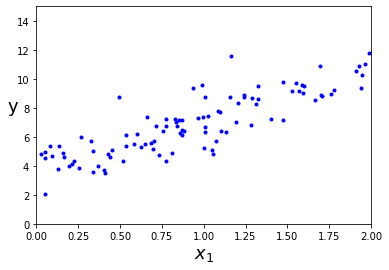

In [59]:
#Sử dụng gradient descent
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)
#Data 1 chiều
X = 2 * np.random.rand(100, 1)#R^100x1 
# Tagret + nosie gaussian
y = 4 + 3 * X + np.random.randn(100, 1)#R^100x1
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [60]:
#R^100x2
X_b = np.c_[np.ones((100, 1)), X]
eta = 0.1  # learning rate
n_iterations = 1000 
m = 100 # số lượng dữ liệu
gradient=[]
# Tolerance(dung sai) để stop thuật toán
tol=1e-3
np.random.seed(2)
theta_3 = np.random.randn(2,1)  #hội tụ nhanh hay chậm một phần cũng nhờ theta_init
for iteration in range(1000):
    gradients = 1/m * X_b.T.dot(X_b.dot(theta_3) - y)
    theta_3 = theta_3 - eta * gradients
    gradient.append(gradients)
    # So sánh gradient cuối với với gradient đứng thứ 10 trở về trước
    if iteration >=10:
       if np.linalg.norm(gradient[-1]-gradient[-10])<tol:
         break
iter=iteration+1
theta_khong=theta_3[0][0]
theta_mot=theta_3[1][0]
theta_3,iter

(array([[3.70456791],
        [3.43163757]]), 183)

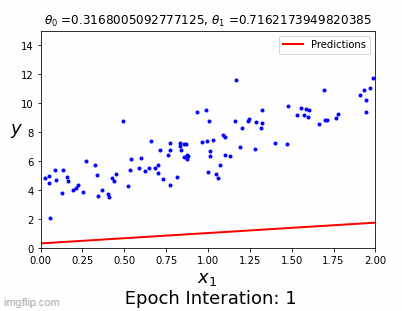

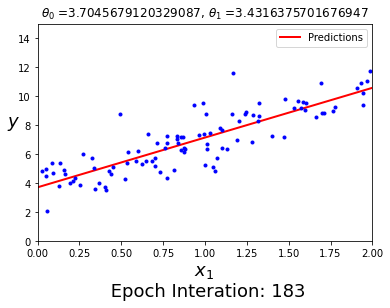

In [61]:
# Tìm 2 điểm X_khong và Y_khong để vẽ đồ thị
#Phương trình đường thẳng có dạng y = theota0 + theota1*x
X_khong=np.array([[0],[2]])
X_khong_bar=np.concatenate((np.ones((2, 1)),X_khong),axis = 1)
Y_khong=X_khong_bar.dot(theta_3)

plt.plot(X_khong, Y_khong, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$ \n Epoch Interation: %d" %iter,fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title('$θ_0$ ='+str(theta_khong)+', $θ_1$ ='+str(theta_mot))
# Tạo label ký hiệu đường trên đồ thị
plt.legend()
plt.axis([0, 2, 0, 15])
plt.show()

In [62]:
#Sử dụng stochastic gradient descents
m=100
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters
theta_4 = np.random.randn(2,1) # theota init random 
tol=1e-4
def learning_schedule(t): # Hàm giảm tốc độ học
    return t0 / (t + t1)

for epoch in range(n_epochs):
   if epoch >1:
      if np.linalg.norm(gradients_0)<tol:
        break
   for i in range(m):
        random_index = np.random.randint(m) # Tạo index ngẫu nhiên từ 0 đến m
        xi = X_b[random_index:random_index+1] # Để máy hiểu đây là mảng 2 chiều
        yi = y[random_index:random_index+1]
        gradients_0 = xi.T.dot(xi.dot(theta_4) - yi)
        eta = learning_schedule(epoch * m + i)
        theta_4 = theta_4 - eta * gradients_0
        if np.linalg.norm(gradients_0)<tol:
           break
theta_4, epoch,i       

(array([[3.65641641],
        [3.46982778]]), 49, 99)

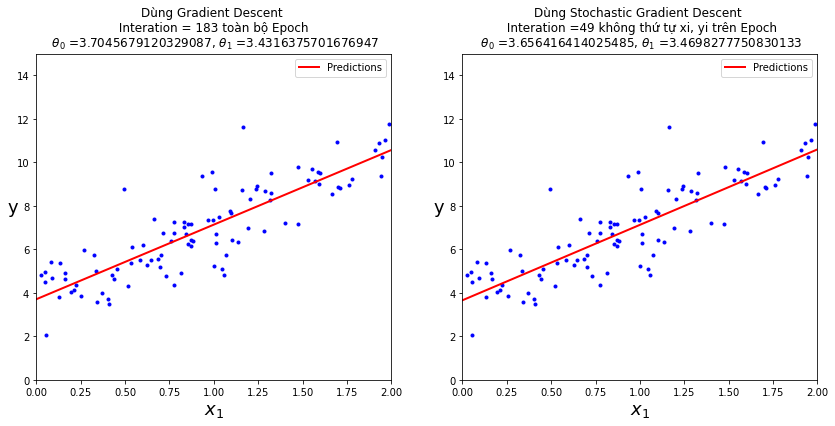

In [63]:
#Tạo 2 điểm để vẽ đồ thị
X_khong_khong=np.array([[0],[2]])
X_khong_khong_bar=np.concatenate((np.ones((2, 1)),X_khong_khong),axis = 1)
Y_khong_khong=X_khong_bar.dot(theta_4)
# Vẽ đồ thị
fig, ((ax1, ax2)) = plt.subplots(nrows=1,ncols=2,figsize=(14,6))

ax1.plot(X, y, "b.")
ax1.plot(X_khong, Y_khong, "r-", linewidth=2, label="Predictions")

ax1.set_title('Dùng Gradient Descent \n Interation = ' +str(iter)+' toàn bộ Epoch \n $θ_0$ ='+str(theta_khong)+', $θ_1$ ='+str(theta_mot))
ax1.set_xlabel("$x_1$",fontsize=18)
ax1.set_ylabel("y",rotation=0, fontsize=18)
ax1.axis([0, 2, 0, 15])

ax2.plot(X, y, "b.")
ax2.plot(X_khong_khong, Y_khong_khong, "r-", linewidth=2,label="Predictions")


ax2.set_title('Dùng Stochastic Gradient Descent \n Interation ='+str(epoch)+' không thứ tự xi, yi trên Epoch\n $θ_0$ ='+str(theta_4[0][0])+', $θ_1$ ='+str(theta_4[1][0]))
ax2.set_xlabel("$x_1$",fontsize=18)
ax2.set_ylabel("y",rotation=0, fontsize=18)
ax2.axis([0, 2, 0, 15])

ax1.legend()
ax2.legend()
plt.show()

# Sử dụng thư viện scikit - learn

In [64]:
#Sử dụng thư viện scikit-learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
#w=(w1,w2,..wn) được xem là coef_ and w0 được xem là intercept_
lin_reg.intercept_, lin_reg.coef_

(array([3.74106117]), array([[3.397613]]))

In [65]:
#Tìm 2 điểm x_zero và y_zero để vẽ đồ thị
x_zero=np.array([[0],[2]])
y_zero=lin_reg.predict(x_zero)
y_zero

array([[ 3.74106117],
       [10.53628717]])

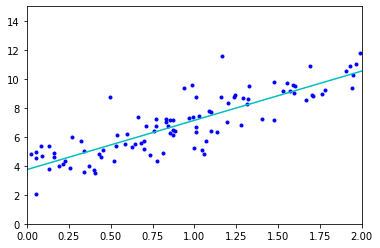

In [66]:
#Vẽ đồ thị 
plt.plot(X, y,'b.' ) 
plt.plot(x_zero, y_zero,'c')
plt.axis([0, 2, 0, 15])
plt.show()

In [67]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [68]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.76979492]), array([3.42224124]))

# 2. Polynomial Regression

In [69]:
m=100
np.random.seed(42)
X=6*np.random.rand(m,1)-2
y=2*X**2+X+np.random.randn(m,1)

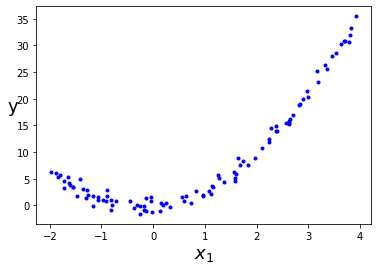

In [70]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.show()

In [71]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.24724071])

In [72]:
X_poly[0]

array([0.24724071, 0.06112797])

In [73]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([-0.08776049]), array([[0.80454367, 2.06456263]]))

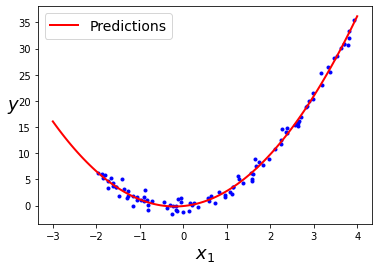

In [74]:
#Phương trình y=2x^2+0.8x-0.08
X_new=np.linspace(-3, 4, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

# 3. Regularization with Regression